In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [57]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.N = 0
        self.mean = 0

    def update(self, x):
        self.N += 1
#         print (self.m , self.mean, self.N)
        self.mean = (1.0 - 1.0/self.N)*self.mean + x/self.N

    def pull(self):
        return np.random.random()+self.m


def run_experiment(m1, m2, m3, eps, N):

    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        # storing for the plot only
        data[i] = x
    cum_avg = np.cumsum(data) / (np.arange(N)+1)

    # plotting data
    plt.plot(cum_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cum_avg

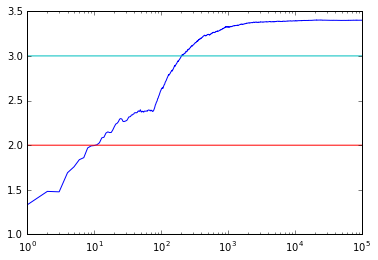

1.4982736890213484
2.4990932080335946
3.5012628647813107


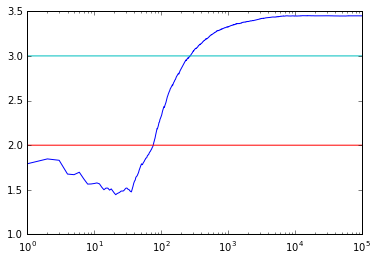

1.493465866096468
2.50462645076643
3.499897884558192


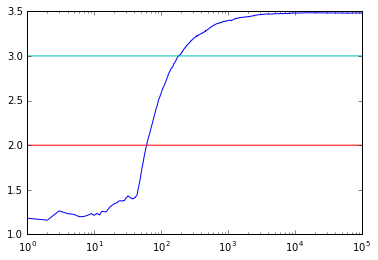

1.4779255797345885
2.524919566523103
3.5004743193213397


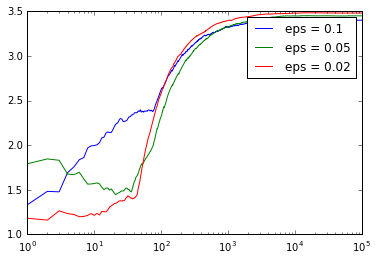

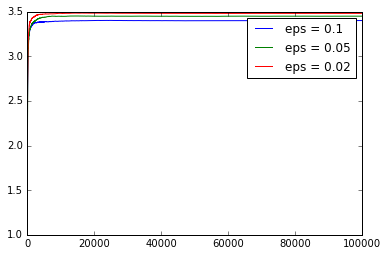

In [58]:
if __name__ == '__main__':
    c1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
    c2 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
    c3 = run_experiment(1.0, 2.0, 3.0, 0.02, 100000)

    # log scale plot
    plt.plot(c1, label='eps = 0.1')
    plt.plot(c2, label='eps = 0.05')
    plt.plot(c3, label='eps = 0.02')
    plt.legend()
    plt.xscale('log')
    plt.show()

    # linear plot
    plt.plot(c1, label='eps = 0.1')
    plt.plot(c2, label='eps = 0.05')
    plt.plot(c3, label='eps = 0.02')
    plt.legend()
    plt.show()

## Optimistic Initial Values

In [65]:
class Bandit2:
    def __init__(self, m):
        self.m = m
        self.N = 1
        self.mean = 10

    def update(self, x):
        self.N += 1
#         print (self.m , self.mean, self.N)
        self.mean = (1.0 - 1.0/self.N)*self.mean + x/self.N

    def pull(self):
        return np.random.random()+self.m


def run_experiment2(m1, m2, m3, eps, N):

    bandits = [Bandit2(m1), Bandit2(m2), Bandit2(m3)]

    data = np.empty(N)

    for i in range(N):
        # optimistic initial values
        j = np.argmax([b.mean for b in bandits])

        x = bandits[j].pull()
        bandits[j].update(x)

        # storing for the plot only
        data[i] = x
    cum_avg = np.cumsum(data) / (np.arange(N)+1)

    # plotting data
    plt.plot(cum_avg)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cum_avg

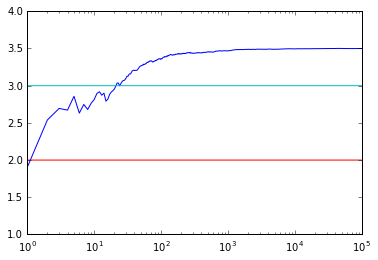

3.4329242826781314
3.452356522807435
3.499867025161637


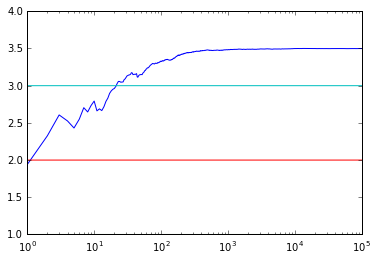

3.1183451753231637
3.480917364150975
3.4992489117122814


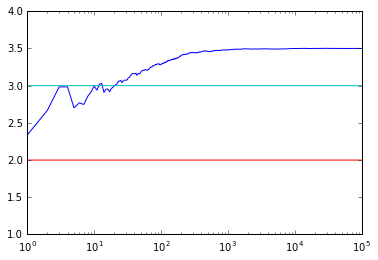

3.2866917285671944
3.3556414831432324
3.5007158667515132


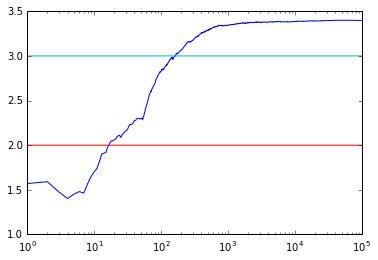

1.491470497462483
2.494609167824459
3.499995446166933


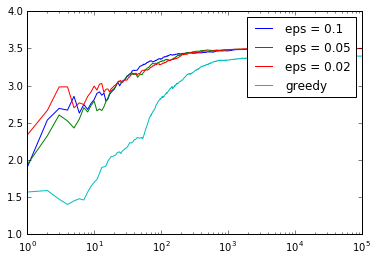

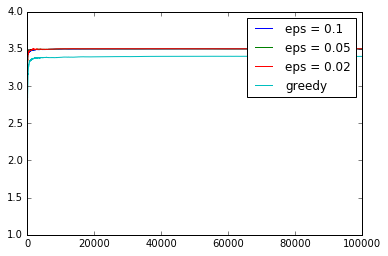

In [70]:
if __name__ == '__main__':
    c1 = run_experiment2(1.0, 2.0, 3.0, 0.1, 100000)
    c2 = run_experiment2(1.0, 2.0, 3.0, 0.05, 100000)
    c3 = run_experiment2(1.0, 2.0, 3.0, 0.02, 100000)
    greedy = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

    # log scale plot
    plt.plot(c1, label='eps = 0.1')
    plt.plot(c2, label='eps = 0.05')
    plt.plot(c3, label='eps = 0.02')
    plt.plot(greedy, label='greedy')
    plt.legend()
    plt.xscale('log')
    plt.show()

    # linear plot
    plt.plot(c1, label='eps = 0.1')
    plt.plot(c2, label='eps = 0.05')
    plt.plot(c3, label='eps = 0.02')
    plt.plot(greedy, label='greedy')
    plt.legend()
    plt.show()

##

In [4]:
%matplotlib inline